# Question 1

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [113]:
tdf_train=pd.read_csv("./Dataset/train.csv")
tdf_test=pd.read_csv("./Dataset/test.csv")
#Replacing Sex and Embarked with numerical values
tdf_train['Sex'] = tdf_train['Sex'].replace(["female", "male"], [0, 1])
tdf_train['Embarked'] = tdf_train['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age             0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   
Embarked       -0.030555  0.108669  0.043835 -0.118593  0.012186 -0.060606   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658 -0.030555  
Survived     0.081629  0.257307  0.108669  
Pclass       0.018443 -0.549500  0.043835  
Sex         -0.245489 -0.182333 -0.118593  

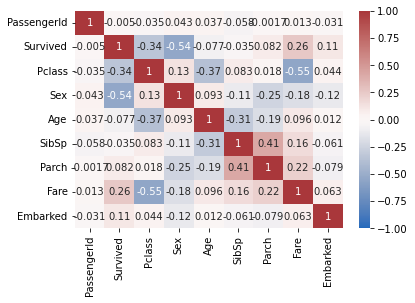

In [115]:
matrix = tdf_train.corr()
print(matrix)
#Heatmap showing the correlation between variables
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [116]:
# We need to keep the "Sex" feature because it has high correlation with survived which is the feature which is to be found

<AxesSubplot:xlabel='Survived', ylabel='Count'>

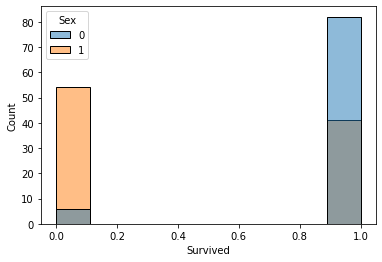

In [127]:
sns.histplot(data=tdf_train, x="Survived", hue="Sex")

In [117]:
classifier=GaussianNB()
tdf_train.dropna(axis=0,inplace=True)
tdf_test['Sex'] = tdf_train['Sex'].replace(["female", "male"], [0, 1])
tdf_test['Embarked'] = tdf_train['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
tdf_test.dropna(axis=0,inplace=True)
x=tdf_train.loc[:,['Age', 'Embarked', 'Fare', 'Parch', 'Sex', 'SibSp']]
y=tdf_train['Survived']
x_test=tdf_test.loc[:,['Age', 'Embarked', 'Fare', 'Parch', 'Sex', 'SibSp']]
y_test=tdf_test

In [118]:
from sklearn.metrics import accuracy_score
classifier.fit(x,y)
y_pred=classifier.predict(x_test)
print('accuracy is',accuracy_score(y[:13], y_pred))

accuracy is 0.8461538461538461


# Question 2

In [119]:
gls_df=pd.read_csv("./Dataset/glass.csv")
X=gls_df.drop(['Type'],axis=1)
y=gls_df['Type']

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
classifier.fit(X,y)
y_pred=classifier.predict(X_test)

In [121]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

accuracy is 0.4186046511627907


In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.27      0.67      0.39         9
           2       0.00      0.00      0.00        19
           3       0.43      0.60      0.50         5
           5       0.33      0.50      0.40         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.42        43
   macro avg       0.45      0.63      0.51        43
weighted avg       0.29      0.42      0.33        43



# Question 3

In [123]:
from sklearn.svm import SVC

In [109]:
svc = SVC(max_iter=1000)
X_trainsvc, X_testsvc, y_trainsvc, y_testsvc = train_test_split(X, y, test_size = 0.2, random_state = 0)
svc.fit(X_trainsvc, y_trainsvc)

Y_predsvc = svc.predict(X_testsvc)

In [110]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_testsvc,Y_predsvc))
print(classification_report(y_testsvc, y_pred))

accuracy is 0.20930232558139536
              precision    recall  f1-score   support

           1       0.27      0.67      0.39         9
           2       0.00      0.00      0.00        19
           3       0.43      0.60      0.50         5
           5       0.33      0.50      0.40         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.42        43
   macro avg       0.45      0.63      0.51        43
weighted avg       0.29      0.42      0.33        43



            RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na   -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg   -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al   -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si   -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K    -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca    0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba   -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe    0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
Type -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

            Ba        Fe      Type  
RI   -0.000386  0.143010 -0.164237  
Na    0.326603 -0.241346  0.502898  
Mg   -0.492262  0.083060 -0.74

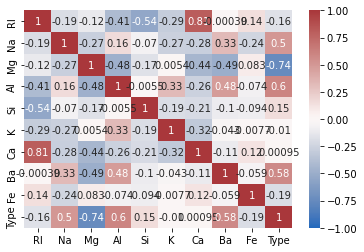

In [111]:
matrix = gls_df.corr()
print(matrix)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [112]:
# Naive bayes has more accuracy than the support vector machine from the above because the features given are independent
# and their is no linear seperation boundary